In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from numba import njit, prange

In [3]:
from analysis_routines import * 
from utide import solve
from ploting_routines import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

[-- 2.0]


In [4]:
temp, pres, date = load_time_series('processed/AGL_20181116_chain.nc')

In [5]:
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
df_c = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fc.csv')
df_s = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_s.csv')

In [7]:
df_buoy = load_buoy_series('AGL_ocean_meteo_20181181.nc')

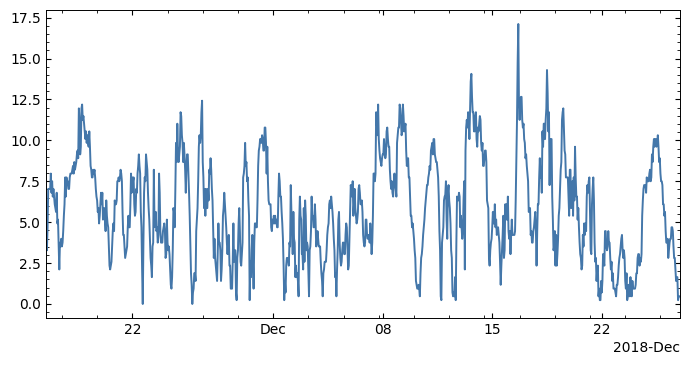

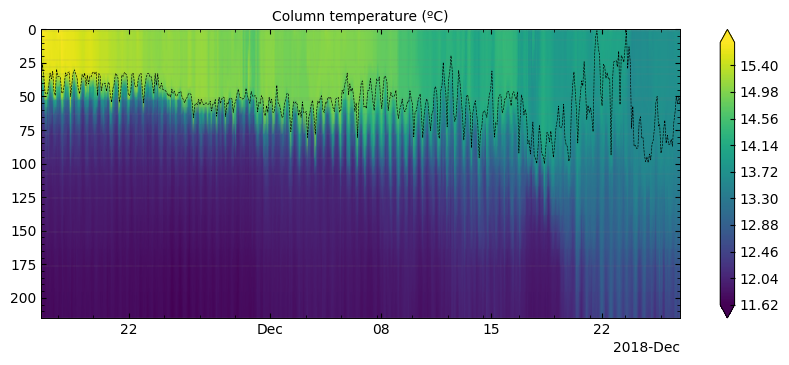

In [45]:
date_1 = datetime(2018, 11, 29)
date_2 = datetime(2018, 11, 30)
def plot_AGL_data(df, var, lims=[None, None]):
    if isinstance(lims[0], datetime):
        lims[0] = date_to_idx(df.index, lims[0])

    if isinstance(lims[1], datetime):
        lims[1] = date_to_idx(df.index, lims[1])
        
    var_arr = df[var][lims[0]:lims[1]]
    date = df.index[lims[0]:lims[1]]
    

    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    
    fig, ax = plt.subplots(figsize=(7, 3.75))
    ax.xaxis.set_major_locator(locator)
    ax.set_xlim(df.index[lims[0]], df.index[lims[1]])
    ax.xaxis.set_major_formatter(formatter)
    ax.plot(date, var_arr)
    fig.tight_layout()
    plt.show()

date_1 = datetime(2018, 11, 16)
date_2 = datetime(2018, 12, 27)
interval = timedelta(minutes=1)
plot_AGL_data(df_buoy, 'wind_speed', lims=[date_1, date_2])
plot_column_temperature(temp, date, pres, df_ci, lims=[date_1, date_2])

In [51]:
from scipy.stats import chi2_contingency
dn = 12

D1_ = df_buoy['wind_speed'][datetime(2018, 11, 16):datetime(2018,11,17)]
print(D1_)
#obs = np.vstack([df_ci['D1'], df_buoy['wind_speed']])

date
2018-11-16 11:00:00    5.15625
2018-11-16 12:00:00    4.68750
2018-11-16 13:00:00    3.28125
2018-11-16 14:00:00    4.68750
2018-11-16 15:00:00    7.03125
2018-11-16 16:00:00    7.03125
2018-11-16 17:00:00    7.03125
2018-11-16 18:00:00    7.03125
2018-11-16 19:00:00    7.96875
2018-11-16 20:00:00    6.79688
2018-11-16 21:00:00    7.50000
2018-11-16 22:00:00    6.56250
2018-11-16 23:00:00    7.03125
2018-11-17 00:00:00    6.56250
Name: wind_speed, dtype: float64


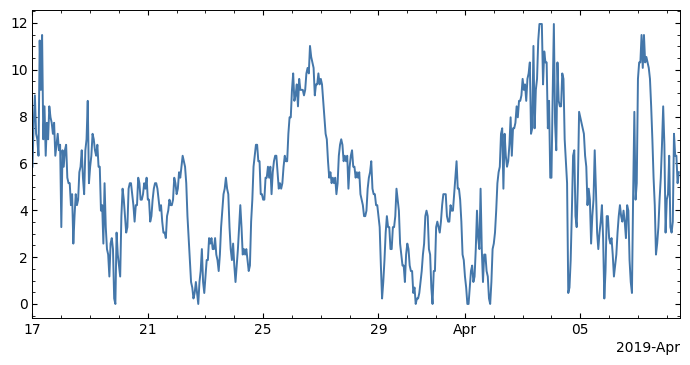

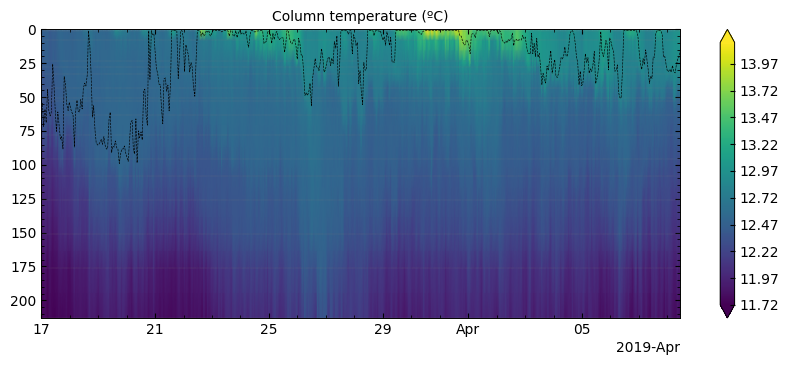

In [44]:
date_1 = datetime(2019, 3, 17)
date_2 = datetime(2019, 3, 27)
interval = timedelta(minutes=1)
plot_AGL_data(df_buoy, 'wind_speed', lims=[date_1, -1])
plot_column_temperature(temp, date, pres, df_ci, lims=[date_1, -1])